We begin importing the necessary libraries and modules

In [1]:
import matplotlib as mpl
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.manifold import Isomap

2024-02-07 19:20:34.928315: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Importing the database
We load the dataset from keras.dataset divided in the train set and the test set

In [2]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#printing the shapes of the vectors 
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


We see that train_X is a 3D array of 60000 samples each consisting of a  28 x 28 grid of pixels while train_y contains the label for each digit. We treat each pixel as a feature, thus we have 60000 samples with 784 features each.

## Plot some elements of the database

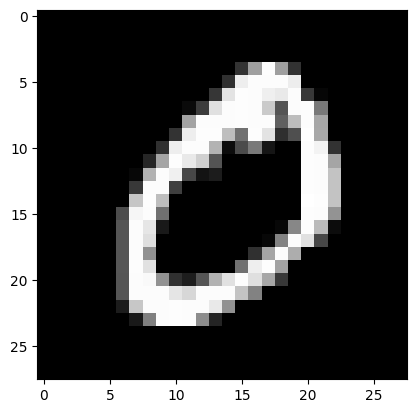

In [3]:
#plot an element from the database

plt.imshow(train_X[1], cmap=plt.get_cmap('gray'))
plt.show()

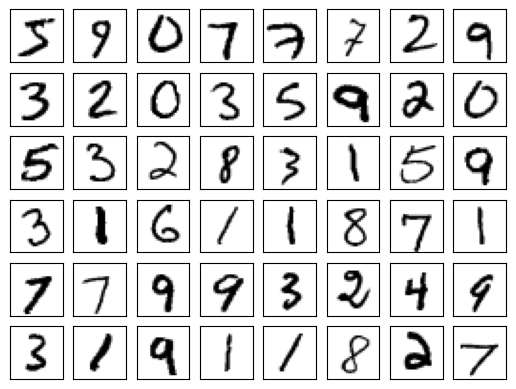

In [4]:
#print some element from the database

fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[])) 
for i, axi in enumerate(ax.flat):
    axi.imshow(train_X[1250 * i], cmap='gray_r')

## Isomap

/var/folders/sg/w5ry03152vx0hhr3jsd2cdy80000gn/T/ipykernel_39211/3340723958.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(proj[:, 0], proj[:, 1], c=target_1, cmap=plt.cm.get_cmap('jet', 10))


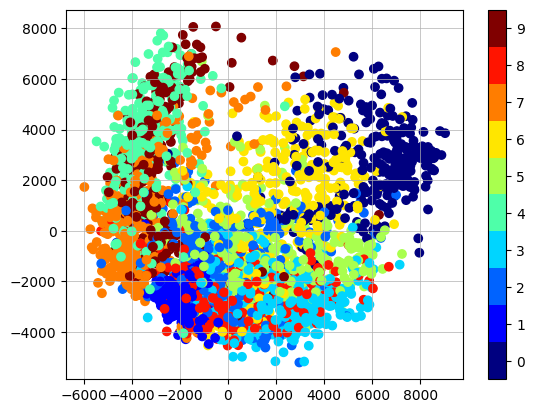

In [5]:
#transform train_X into a 2D array and rename to data. Rename train_y as target
nsamples, nx, ny = train_X.shape             
data = train_X.reshape((nsamples,nx*ny))
target = train_y    
test = test_X.reshape(10000, 784)

# use only 1/20 of the data 
data_1 = data[::20]
target_1 = target[::20]

model = Isomap(n_components=2)

proj = model.fit_transform(data_1)
plt.scatter(proj[:, 0], proj[:, 1], c=target_1, cmap=plt.cm.get_cmap('jet', 10))
plt.grid( linestyle='-', linewidth=0.5)
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

In [6]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2 
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
                dist = np.sum((proj[i] - shown_images) ** 2, 1) 
                if np.min(dist) > min_dist_2 :
                    # don't show points that are too close
                    
                    shown_images = np.vstack([shown_images, proj[i]])
                    imagebox = offsetbox.AnnotationBbox(
                    offsetbox.OffsetImage(images[i], cmap=cmap), proj[i])
                    ax.add_artist(imagebox)

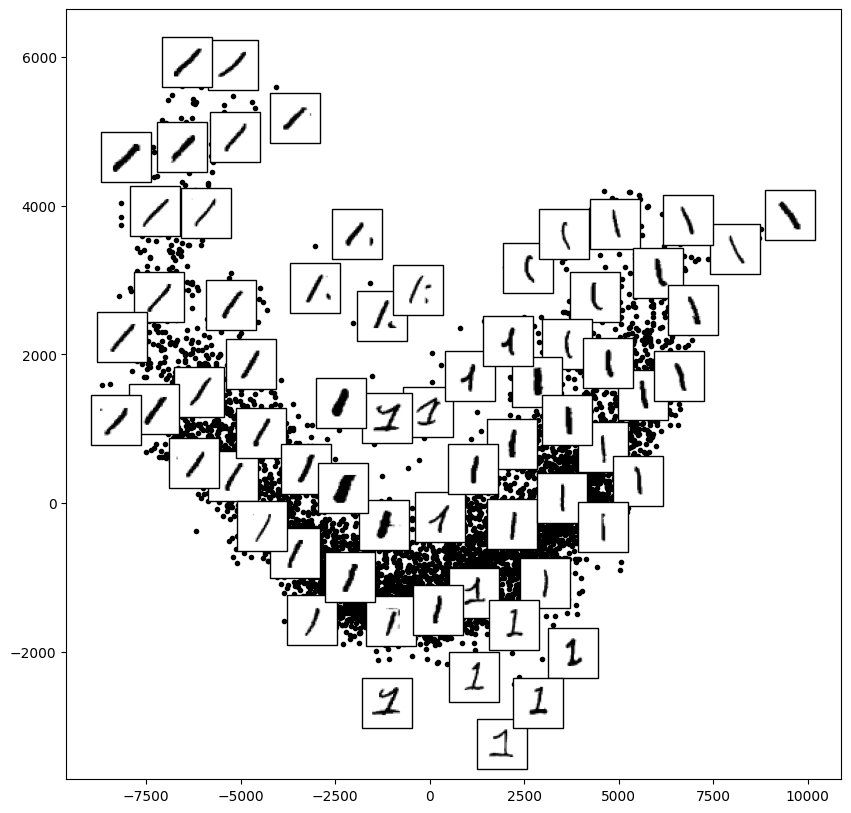

In [7]:
# Choose the digits to project

digit = data[target == 1] 

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(digit, model, images=digit.reshape((-1, 28, 28)), ax=ax, thumb_frac=0.05, cmap='gray_r')
                           

## Classical ML classification problem

0.5558


Text(47.25, 0.5, 'True label')

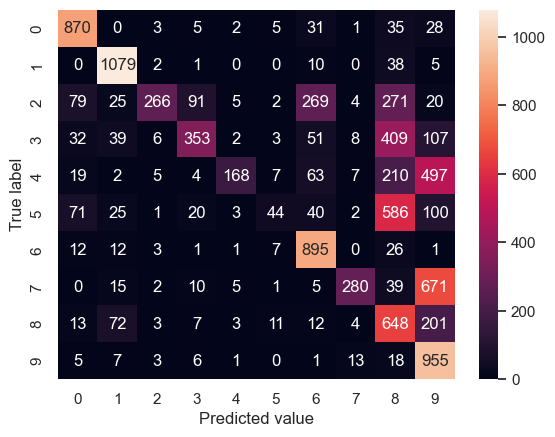

In [8]:
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

model = GaussianNB()
model.fit(data, target)
y_model = model.predict(test)

print(accuracy_score(test_y, y_model))

mat = confusion_matrix(test_y, y_model)
#mat = pd.DataFrame(mat)
sns.heatmap(mat, square = False, annot = True, cbar = True, fmt = '.0f')
plt.xlabel('Predicted value')
plt.ylabel('True label')

## Random Forest Classifier

We try with a more sophisticated method, the Random Forest classifier:

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_estimators = 1000)
model.fit(data, target)
ypred = model.predict(test)

print(metrics.classification_report(ypred, test_y))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       997
           1       0.99      0.99      0.99      1134
           2       0.97      0.96      0.97      1039
           3       0.97      0.96      0.97      1014
           4       0.97      0.98      0.98       979
           5       0.97      0.98      0.97       880
           6       0.98      0.98      0.98       962
           7       0.97      0.97      0.97      1023
           8       0.96      0.96      0.96       967
           9       0.95      0.96      0.96      1005

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Text(74.45000000000006, 0.5, 'True Label')

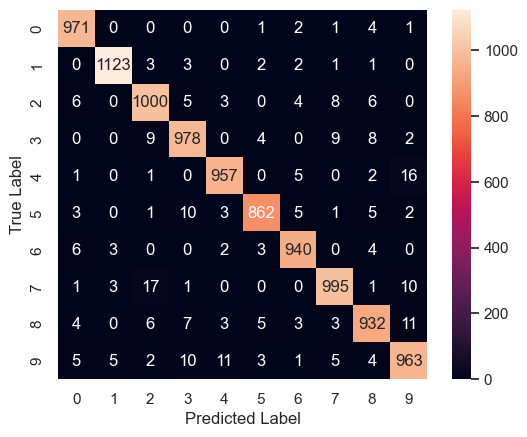

In [10]:
from sklearn.metrics import confusion_matrix 

mat = confusion_matrix(test_y, ypred)
sns.heatmap(mat, square = True, annot = True, fmt='d', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## PCA reduction

Compute explained variance ratio to see the number of features required.

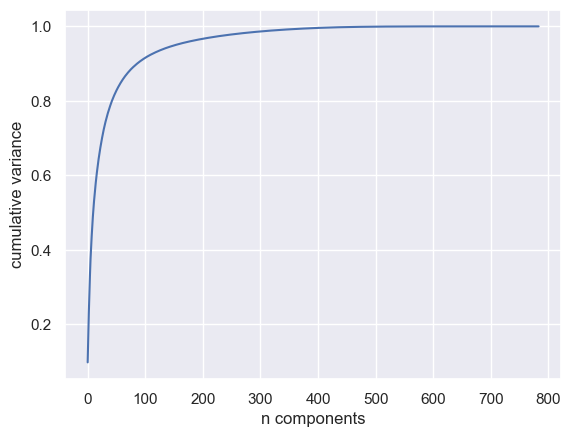

In [29]:
from sklearn.decomposition import PCA

pca = PCA().fit(data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')
plt.grid(True)


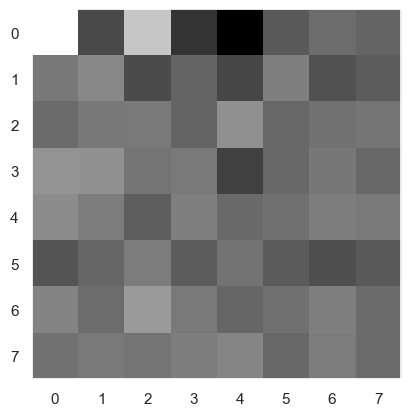

Data shape after PCA reduction: (60000, 64)


In [25]:
num_components = 64

pca = PCA(n_components= num_components).fit(data)
dataPCA = pca.fit_transform(data)
dataPCA_1 = dataPCA.reshape(60000, int(np.sqrt(num_components)), int(np.sqrt(num_components)))
plt.imshow(dataPCA_1[1], cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.show()

print('Data shape after PCA reduction:', dataPCA.shape)

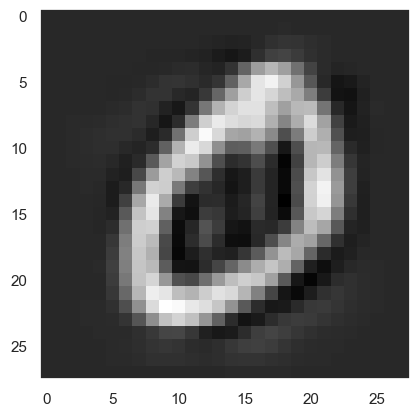

Data shape after inverse PCA reduction: (60000, 28, 28)


In [26]:
data_new = pca.inverse_transform(dataPCA)
data_new_1 = data_new.reshape(60000, 28, 28)
plt.imshow(data_new_1[1], cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.show()

print('Data shape after inverse PCA reduction:', data_new_1.shape)

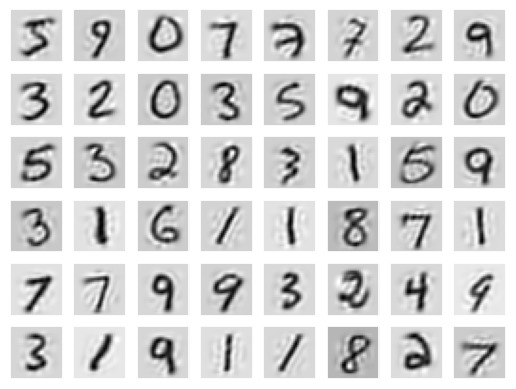

In [27]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[])) 
for i, axi in enumerate(ax.flat):
    axi.imshow(data_new_1[1250 * i], cmap='gray_r')